# National Income and Infant Mortality

In this Jupyter Notebook, we'll analyze the relationship between a country's GDP per capita (a measure of average income per person) and infant mortality (in particular, the share of every 1,000 children born who do not reach their fifth birthday). 

## Data

Data for this analysis comes from the World Bank's *World Development Indicators* database. 

In [1]:
import pandas as pd
import numpy as np

# Download World Development Indicators
wdi = pd.read_csv(
    "https://media.githubusercontent.com/"
    "media/nickeubank/MIDS_Data/"
    "master/World_Development_Indicators/wdi_small_tidy_2015.csv"
)

Now let's quickly look at our data. The next command just shows us the first 5 rows of our data (we'll spend more time on these tools in later lessons). Note further than you can scroll right to see more columns!:

In [2]:
wdi.head()

,Country Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),Battle-related deaths (number of people),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,73.1264,NaN,17273.0,3.5,2.5,3.0,3.0,3.0,3.0,...,32.6,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,NaN
1,Albania,20.6922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.3
2,Algeria,10.7052,28.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.8
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Now we can just print out the column names:
wdi.columns

Index(['Country Name',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV)',
       'Battle-related deaths (number of people)',
       'CPIA building human resources rating (1=low to 6=high)',
       'CPIA business regulatory environment rating (1=low to 6=high)',
       'CPIA debt policy rating (1=low to 6=high)',
       'CPIA economic management cluster average (1=low to 6=high)',
       'CPIA efficiency of revenue mobilization rating (1=low to 6=high)',
       'CPIA equity of public resource use rating (1=low to 6=high)',
       ...
       'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)',
       'Women who believe a husband is justified in beating his wife (any of five reasons) (%)',
       'Women who believe a husband is justified in beating his wife when she argues with him (%)',
       'Wom

## Visualizing the Relationship between Log GDP Per Capita and Infant Mortality

[Now it's your turn! insert the plot from `analyze_health_and_income.py` here and make any required changes to make it work]

C:\Users\79104\AppData\Local\Temp\ipykernel_18364\230739416.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  .theme({**style.library["seaborn-whitegrid"]})


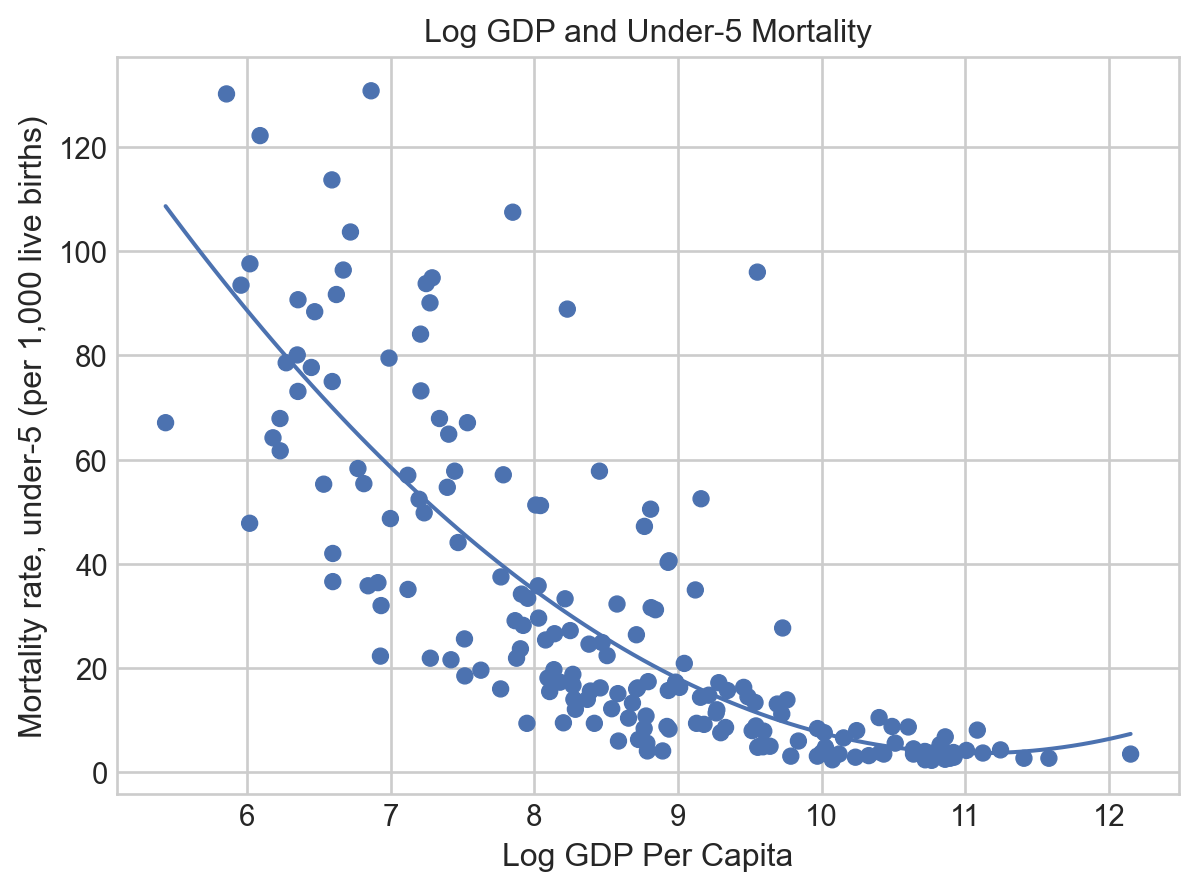

In [5]:
import seaborn.objects as so
import seaborn as sns
from matplotlib import style

# GDP Per Capita has a REALLY long right tail, so we want to log it for readability.
wdi["Log GDP Per Capita"] = np.log(wdi["GDP per capita (constant 2010 US$)"])

my_chart = (
    so.Plot(
        wdi, x="Log GDP Per Capita", y="Mortality rate, under-5 (per 1,000 live births)"
    )
    .add(so.Line(), so.PolyFit(order=2))
    .add(so.Dot())
    .label(title="Log GDP and Under-5 Mortality")
    .theme({**style.library["seaborn-whitegrid"]})
)

my_chart

## Tell Me Something Cool You've Learned

Write me a little markdown cell (with some fun formatting!) telling me something you saw in the plot you didn't expect.

### *Overview of the Figure*
* The overall trend in the figure is a decline.
* There is a concentration of data points in the lower-right quadrant.

### *Preliminary Analysis of the Results*
* It appears that countries with higher GDP per capita tend to exhibit lower under-5 mortality rates.
* The dataset seems to comprise a larger number of countries with higher GDPs compared to those with lower GDPs.

***
## *To assess the fairness of the dataset,* 
## *It is essential to visualize the distribution of Log GDP Per Capita.*

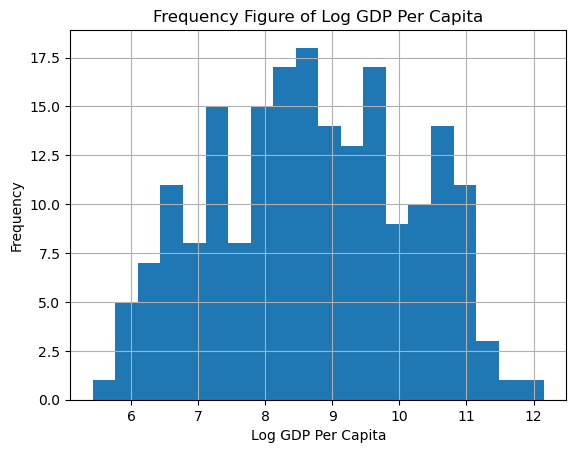

In [9]:
import matplotlib.pyplot as plt
# Create a histogram
log_gdp_per_capita = wdi["Log GDP Per Capita"]
plt.hist(log_gdp_per_capita, bins=20)
plt.xlabel("Log GDP Per Capita")
plt.ylabel("Frequency")
plt.title("Frequency Figure of Log GDP Per Capita")
plt.grid(True)
plt.show()

***
### *Additional Insights*
* The distribution of Log GDP Per Capita closely resembles a normal distribution, suggesting that the dataset appears to be fairly representative.
* This finding contradicts the earlier observation of a higher number of data points with higher GDP Per Capita values. Consequently, it is reasonable to conclude that when GDP Per Capita reaches a sufficiently high level, the under-5 mortality rate may experience only marginal changes.

## Export and Send Your Notebook to Me!

When you are finished, the next step is to export this notebook. 

In my experience, the best way to do this is as follows: 

1. Along the top of your notebook, select "Export" (it might be in the three-dot menu).
2. Choose "HTML" and **save it next to this notebook file**. This is important because any images in the HTML have relative file paths that are set up to be in reference to the location of your notebook, so if you save it somewhere else, when you open it you may lose all your images. 
3. Open that HTML in your normal web browser (Chrome, Firefox, etc), **not** in VS Code.
4. Print the page to PDF.

Why do this instead of choosing the PDF option when exporting? If you try and export a notebook directly to PDF, VS Code will actually try and use a tool to convert it to a LaTeX document, compile that latex document, then print, and getting this setup right can be a pain, and the LaTeX conversion often causes problems. So while a little convoluted, that's my recommendation. 

Now that you have a PDF, please upload it to Gradescope!